<a href="https://colab.research.google.com/github/Ajay-Kandagatla/DATASCIENCE/blob/main/Phishing_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning Model:

Phising Dataset Prediction Model

##Problem Definition



## Define Problem Statement:

Based on phishing dataset, we have to build model which can able to predict the status depends on independent columns

##End User Objective:

##Outcome:

##Import Neccessory Library

In [3]:
# Import Data Manipulation Libraries
import pandas as pd
import numpy as np
# Import Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Import Warnings Libraries
import warnings
warnings.filterwarnings('ignore')
# Import logging
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    filemode = 'w',
                    format = '%(asctime)s - %(message)s -%(levelname)s',
                    force = True)
# Import Scikit Learn Libraries
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

##Import Dataset using Pandas Function

In [4]:
df = pd.read_csv('dataset_phishing.csv')
df.sample(frac = 1)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
7229,https://www.what-appinvited01.2waky.com/,40,31,0,3,1,0,0,0,0,...,1,1,0,162,7142,8441470,1,1,1,phishing
5809,https://theavon.co.zw/sec/?referrer=other,41,13,0,2,0,0,1,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6461,https://www.lynnwoodicecenter.com/,34,25,0,2,0,0,0,0,0,...,1,1,0,983,-1,3481179,0,0,3,legitimate
4227,https://milenyumpark.com.tr/iletisim,36,19,0,2,0,0,0,0,0,...,1,0,0,0,1198,0,0,1,1,phishing
10700,http://www.carolinamariculture.com/,35,27,0,2,0,0,0,0,0,...,1,1,0,566,2356,0,0,0,2,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331,http://www.grocery.com/save-a-lot/,34,15,0,2,2,0,0,0,0,...,0,0,0,236,8896,216550,0,0,4,legitimate
9362,https://file.al/?op=login,25,7,0,1,0,0,1,0,0,...,0,0,1,0,-1,70339,0,0,3,legitimate
7443,http://www.microoyun.com/games/play/traffic-co...,55,17,0,2,2,0,0,0,0,...,1,0,0,1555,3924,181574,0,0,3,legitimate
167,https://fas.org/sgp/crs/misc/R42078.pdf,39,7,0,2,0,0,0,0,0,...,1,1,0,245,9253,21542,0,0,6,legitimate


In [5]:
logging.info('Model has been Called using pandas function')

In [6]:
df = df.drop(columns = 'url',axis = 1)

In [7]:
df

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,45,17,0,2,0,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,84,18,0,5,0,1,1,0,0,1,...,1,0,0,211,6728,0,0,1,0,phishing
11427,105,16,1,2,6,0,1,0,0,1,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,38,30,0,2,0,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


##Checking Information about Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 88 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   length_url                  11430 non-null  int64  
 1   length_hostname             11430 non-null  int64  
 2   ip                          11430 non-null  int64  
 3   nb_dots                     11430 non-null  int64  
 4   nb_hyphens                  11430 non-null  int64  
 5   nb_at                       11430 non-null  int64  
 6   nb_qm                       11430 non-null  int64  
 7   nb_and                      11430 non-null  int64  
 8   nb_or                       11430 non-null  int64  
 9   nb_eq                       11430 non-null  int64  
 10  nb_underscore               11430 non-null  int64  
 11  nb_tilde                    11430 non-null  int64  
 12  nb_percent                  11430 non-null  int64  
 13  nb_slash                    114

##Checking Null Values Information

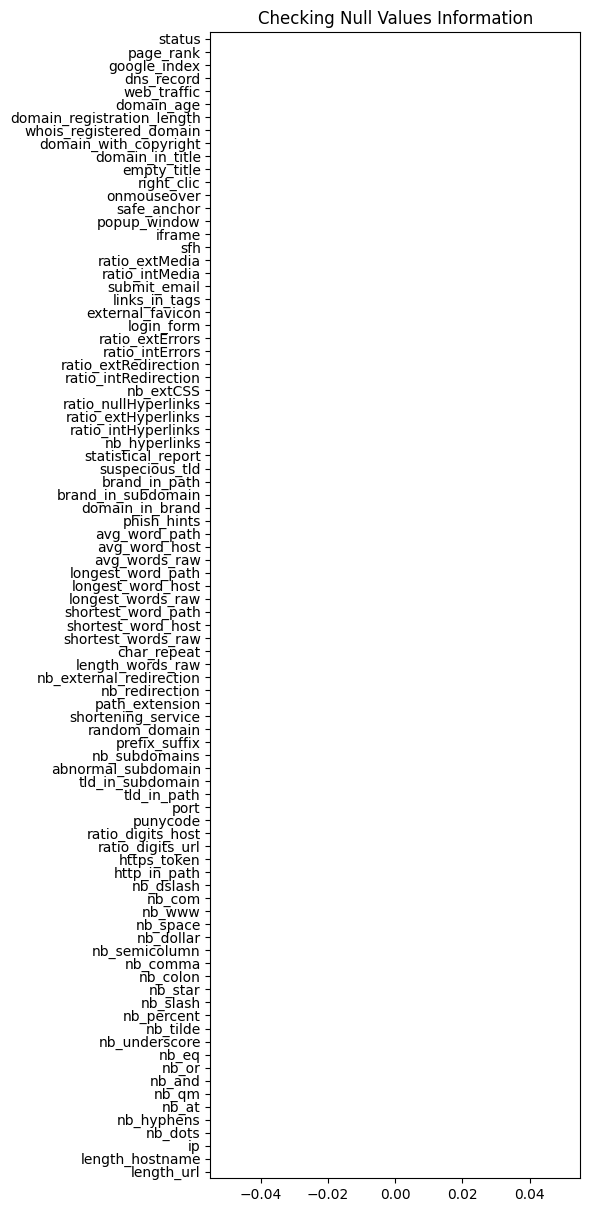

In [9]:
plt.figure(figsize = (6,12))
df.isnull().sum().plot(kind = 'barh')
plt.tight_layout()
plt.title('Checking Null Values Information')
plt.show()

##Segregate Numerical columns and Categorical columns

In [10]:
numerical_col = df.select_dtypes(exclude = 'object')
categorical_col = df.select_dtypes(include = 'object')

##EDA : Checking Univariate Analysis

In [11]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

from collections import OrderedDict

stats = []

for i in numerical_col.columns:
  numerical_stats = OrderedDict({
      'Feature':i,
      'Count':df[i].count(),
      'Median':df[i].median(),
      'Mean':df[i].mean(),
      'Minimum':df[i].min(),
      'Maximum':df[i].max(),
      'Q1':df[i].quantile(0.25),
      'Q3':df[i].quantile(0.75),
      'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
      'Standard Deviation':df[i].std(),
      'Skewness':df[i].skew(),
      'Kurtosis':df[i].kurt()

  })
  stats.append(numerical_stats)

  report = pd.DataFrame(stats)


report

,Feature,Count,Median,Mean,Minimum,Maximum,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis
0,length_url,11430,47.000000,61.126684,12.0,1.641000e+03,33.000000,71.000000,38.000000,5.529732e+01,8.085190,144.196391
1,length_hostname,11430,19.000000,21.090289,4.0,2.140000e+02,15.000000,24.000000,9.000000,1.077717e+01,5.160078,69.829931
2,ip,11430,0.000000,0.150569,0.0,1.000000e+00,0.000000,0.000000,0.000000,3.576436e-01,1.954418,1.820067
3,nb_dots,11430,2.000000,2.480752,1.0,2.400000e+01,2.000000,3.000000,1.000000,1.369686e+00,5.718117,66.155843
4,nb_hyphens,11430,0.000000,0.997550,0.0,4.300000e+01,0.000000,1.000000,1.000000,2.087087e+00,4.695239,40.696686
5,nb_at,11430,0.000000,0.022222,0.0,4.000000e+00,0.000000,0.000000,0.000000,1.554999e-01,8.272893,95.457038
6,nb_qm,11430,0.000000,0.141207,0.0,3.000000e+00,0.000000,0.000000,0.000000,3.644558e-01,2.488737,6.060591
7,nb_and,11430,0.000000,0.162292,0.0,1.900000e+01,0.000000,0.000000,0.000000,8.213374e-01,9.725295,139.140959
8,nb_or,11430,0.000000,0.000000,0.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
9,nb_eq,11430,0.000000,0.293176,0.0,1.900000e+01,0.000000,0.000000,0.000000,9.983172e-01,6.530036,70.909580


In [12]:
report[report['IQR'] == 0]['Feature'].values

array(['ip', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq',
       'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_star', 'nb_colon',
       'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_com',
       'nb_dslash', 'http_in_path', 'ratio_digits_host', 'punycode',
       'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_external_redirection', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 'ratio_nullHyperlinks',
       'ratio_intRedirection', 'ratio_intErrors', 'login_form',
       'submit_email', 'sfh', 'iframe', 'popup_window', 'onmouseover',
       'right_clic', 'empty_title', 'domain_in_title',
       'whois_registered_domain', 'dns_record'], dtype=object)

In [13]:
df = df.drop(columns = ['ip', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq',
       'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_star', 'nb_colon',
       'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_com',
       'nb_dslash', 'http_in_path', 'ratio_digits_host', 'punycode',
       'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_external_redirection', 'phish_hints',
       'domain_in_brand', 'brand_in_subdomain', 'brand_in_path',
       'suspecious_tld', 'statistical_report', 'ratio_nullHyperlinks',
       'ratio_intRedirection', 'ratio_intErrors', 'login_form',
       'submit_email', 'sfh', 'iframe', 'popup_window', 'onmouseover',
       'right_clic', 'empty_title', 'domain_in_title',
       'whois_registered_domain', 'dns_record'],axis = 1 )

In [14]:
df['status'].value_counts()

,count
status,
legitimate,5715
phishing,5715


In [15]:
df['status'] = df['status'].replace({'legitimate':1,'phishing':0})

##EDA: BI Variate Analysis

In [16]:
X = df.drop(columns = 'status',axis = 1)
y = df['status']

##Data Imputation

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

##Data Insights

In [18]:
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##Data Encoding

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train,y_train)

##Split the Dataset into X and y

In [20]:
y_pred = rf.predict(X_test)

##Use train_test_split

In [21]:
accuracy_score(y_test,y_pred)

0.958296879556722

##Balancing Target Column: In case of Classification Models

<Axes: xlabel='status'>

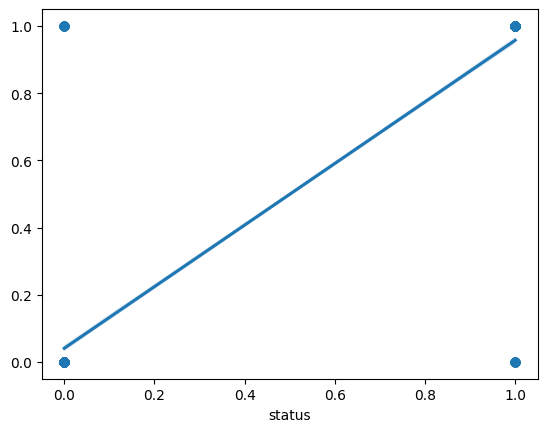

In [22]:
sns.regplot(x = y_test,y=y_pred)

##Use Scaling Technique

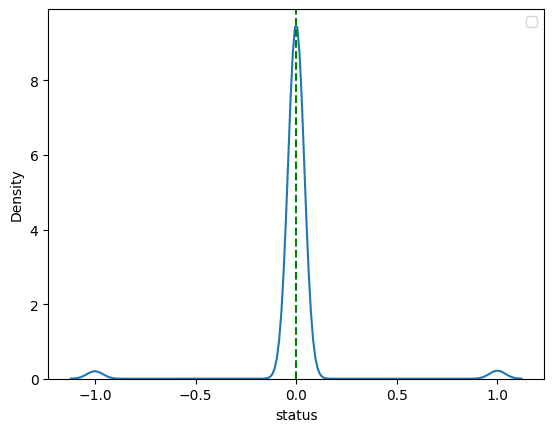

In [23]:
sns.kdeplot(y_test-y_pred)
plt.axvline(0,linestyle = '--',color = 'green')
plt.legend()
plt.show()

##Model Building

<Axes: >

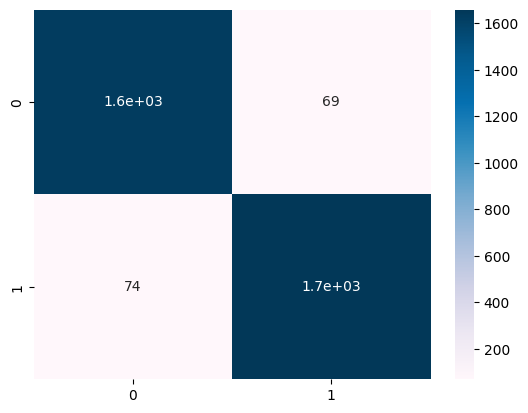

In [24]:
sns. heatmap (confusion_matrix(y_test,y_pred),cmap = 'PuBu',annot = True)

##Best Model: Use Pickle

In [25]:
# USing Randomized search cv

from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300,500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [26]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/1

In [5]:
import pandas as pd
from pycaret.classification import *

In [6]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [7]:
clf = setup(
    data=df,
    target='status',
    session_id=42,
    train_size=0.8,
    normalize=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.9,
)

,Description,Value
0,Session id,42
1,Target,status
2,Target type,Binary
3,Target mapping,"legitimate: 0, phishing: 1"
4,Original data shape,"(11430, 89)"
5,Transformed data shape,"(11430, 87)"
6,Transformed train set shape,"(9144, 87)"
7,Transformed test set shape,"(2286, 87)"
8,Numeric features,87
9,Categorical features,1


In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9470,0.9867,0.9470,0.9479,0.9469,0.8939,0.8949,1.1800
lr,Logistic Regression,0.9415,0.9846,0.9415,0.9417,0.9415,0.8830,0.8832,1.8340
knn,K Neighbors Classifier,0.9384,0.9761,0.9384,0.9389,0.9384,0.8769,0.8773,0.6470
ridge,Ridge Classifier,0.8993,0.9624,0.8993,0.9030,0.8990,0.7986,0.8022,0.3540
lda,Linear Discriminant Analysis,0.5967,0.6325,0.5967,0.6065,0.5638,0.1938,0.2006,0.5730
svm,SVM - Linear Kernel,0.5699,0.9328,0.5699,0.7026,0.4667,0.1397,0.2242,0.3650
nb,Naive Bayes,0.5186,0.5440,0.5186,0.3037,0.3657,0.0372,0.0431,0.4460
rf,Random Forest Classifier,0.5054,0.9889,0.5054,0.3514,0.3444,0.0111,0.0273,1.2460
xgboost,Extreme Gradient Boosting,0.5000,0.5000,0.5000,0.2500,0.3333,0.0000,0.0000,0.6480
lightgbm,Light Gradient Boosting Machine,0.5000,0.7063,0.5000,0.2500,0.3333,0.0000,0.0000,1.4880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [9]:
final_model = finalize_model(best_model)
final_model

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['length_url', 'length_hostname',
                                             'ip', 'nb_dots', 'nb_hyphens',
                                             'nb_at', 'nb_qm', 'nb_and',
                                             'nb_or', 'nb_eq', 'nb_underscore',
                                             'nb_tilde', 'nb_percent',...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                      max_leaf_nodes=None, max_samples=None,
                                      min_impurity_decrease=0.0,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      monotonic_cst=None, n_estimators=100,
                                      n_jobs=-1, oob_score=False,
                                      random_state=42, verbose=0,
                                      warm_start=False))],
         verbose=False)

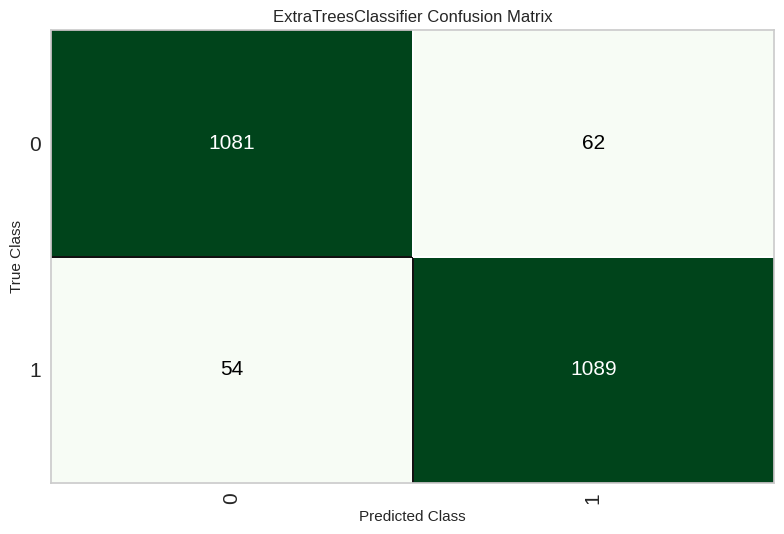

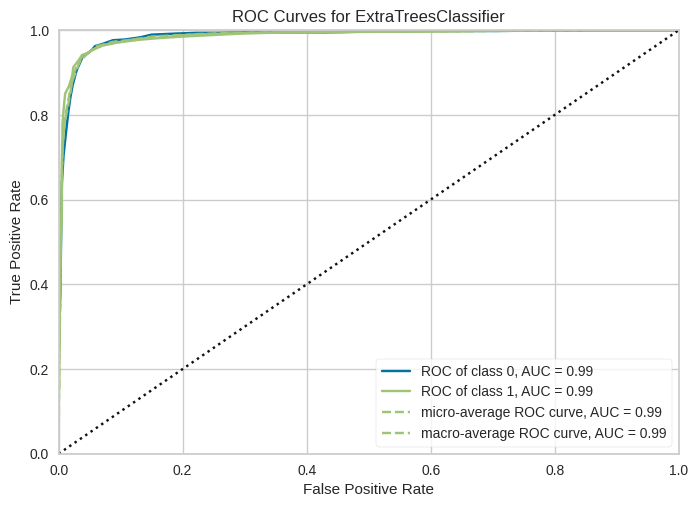

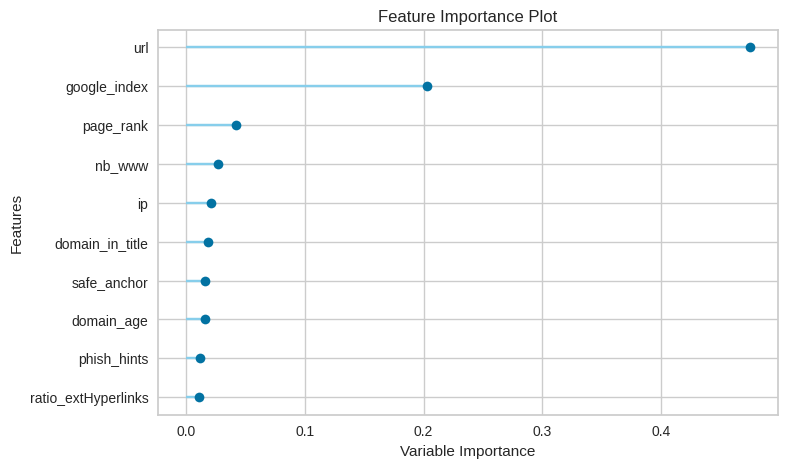

In [10]:
plot_model(best_model,plot='confusion_matrix')
plot_model(best_model,plot='auc')
plot_model(best_model,plot='feature')

In [ ]:
rscv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rscv.fit(X_train, y_train)

In [ ]:
# Best model
best_model = rscv.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
print("Best Parameters:", rscv.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

scores = []

for train_idx, val_idx in kf.split(X_train):
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)

    acc = accuracy_score(y_val, y_pred)
    scores.append(acc)
scores